In [ ]:
from google.colab import drive


In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/DATA/train.csv', nrows=100000)

In [ ]:
df_train.columns

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')

In [ ]:
df_train.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,ddd2926e,44956a24,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,96809ac8,711ee120,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,b3cf8def,8a4875bd,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,e8275b8f,6332421a,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,07d7df22,a99f214a,9644d0bf,779d90c2,1,0,18993,320,50,2161,0,35,-1,157


In [ ]:
df_train.describe()

,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,1.000000e+05,100000.000000,100000.0,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,9.500813e+18,0.174900,14102100.0,1005.034410,0.19830,1.055730,0.199270,17682.145900,318.333960,56.818920,1964.034380,0.789350,131.734480,37874.227610,88.555670
std,5.669410e+18,0.379883,0.0,1.088741,0.40264,0.583993,0.635268,3237.735265,11.931939,36.924104,394.962696,1.223761,244.076787,48546.274316,45.482841
min,3.237563e+13,0.000000,14102100.0,1001.000000,0.00000,0.000000,0.000000,375.000000,120.000000,20.000000,112.000000,0.000000,33.000000,-1.000000,13.000000
25%,4.183340e+18,0.000000,14102100.0,1005.000000,0.00000,1.000000,0.000000,15704.000000,320.000000,50.000000,1722.000000,0.000000,35.000000,-1.000000,61.000000
50%,1.074496e+19,0.000000,14102100.0,1005.000000,0.00000,1.000000,0.000000,17654.000000,320.000000,50.000000,1993.000000,0.000000,35.000000,-1.000000,79.000000
75%,1.457542e+19,0.000000,14102100.0,1005.000000,0.00000,1.000000,0.000000,20362.000000,320.000000,50.000000,2306.000000,2.000000,39.000000,100083.000000,156.000000
max,1.844670e+19,1.000000,14102100.0,1010.000000,5.00000,5.000000,5.000000,21705.000000,728.000000,480.000000,2497.000000,3.000000,1835.000000,100248.000000,157.000000


In [ ]:
#descriptive statistics summary
df_train['click'].describe()

count    100000.000000
mean          0.174900
std           0.379883
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: click, dtype: float64

In [ ]:
var = 'device_type'
data = pd.concat([df_train['click'], df_train[var]], axis=1)

1    92597
0     4212
4     2979
5      212
Name: device_type, dtype: int64

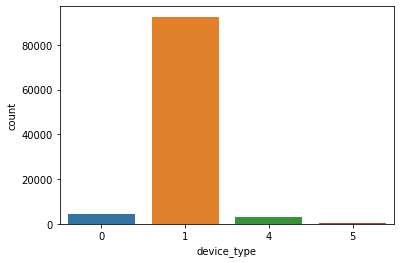

In [ ]:
sns.countplot(x="device_type", data=data)
data.loc[:,'device_type'].value_counts()

In [ ]:
device_type_table = pd.crosstab(index = df_train["C14"], columns = df_train["click"])
device_type_table 

click,0,1
C14,,
375,46,24
377,37,20
380,36,17
381,4,5
452,19,12
...,...,...
21701,4,1
21702,5,0
21703,6,0


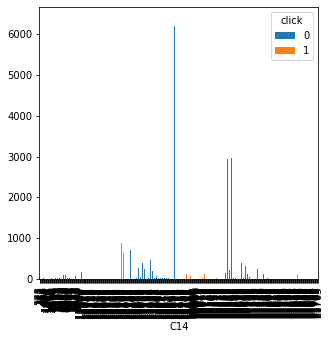

In [ ]:
device_type_table.plot(kind = "bar", figsize = (5,5), stacked = False)

In [ ]:
pearson = df_train.corr(method = 'pearson')

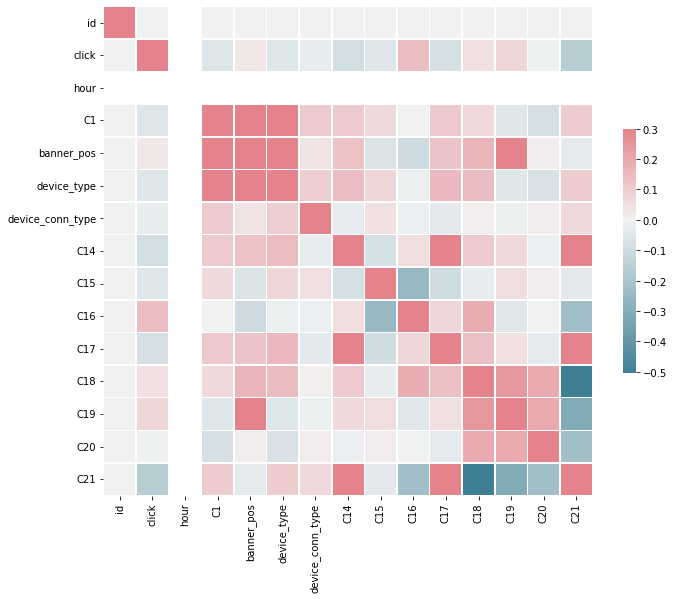

In [ ]:
f, ax = plt.subplots(figsize=(11,9))

#generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(pearson, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
#drop some non-infomrative columns

df_trains = df_train.drop('id', axis=1) 

# do some tranformations first if using this col 
df_train.drop( 'hour', axis=1)

,id,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,ddd2926e,44956a24,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,96809ac8,711ee120,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,b3cf8def,8a4875bd,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,e8275b8f,6332421a,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,07d7df22,a99f214a,9644d0bf,779d90c2,1,0,18993,320,50,2161,0,35,-1,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,7.336716e+18,0,1005,0,85f751fd,c4e18dd6,50e219e0,5e3f096f,2347f47a,0f2161f8,a99f214a,7fa0b614,be74e6fe,1,0,21611,320,50,2480,3,297,100111,61
99996,7.337102e+18,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,b789b7fa,711ee120,1,0,15702,320,50,1722,0,35,-1,79
99997,7.337105e+18,1,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,85cd2524,293291c1,1,0,15702,320,50,1722,0,35,-1,79
99998,7.337331e+17,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,eee01b6c,8a4875bd,1,0,15708,320,50,1722,0,35,-1,79


In [ ]:
df_train.isnull().sum().sort_values(ascending = False)

C21                 0
C20                 0
click               0
hour                0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
id                  0
dtype: int64

In [ ]:
#categorical
print(df_train.dtypes)

id                  float64
click                 int64
hour                  int64
C1                    int64
banner_pos            int64
site_id              object
site_domain          object
site_category        object
app_id               object
app_domain           object
app_category         object
device_id            object
device_ip            object
device_model         object
device_type           int64
device_conn_type      int64
C14                   int64
C15                   int64
C16                   int64
C17                   int64
C18                   int64
C19                   int64
C20                   int64
C21                   int64
dtype: object


In [ ]:
df_train.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,ddd2926e,44956a24,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,96809ac8,711ee120,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,b3cf8def,8a4875bd,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,e8275b8f,6332421a,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,07d7df22,a99f214a,9644d0bf,779d90c2,1,0,18993,320,50,2161,0,35,-1,157


In [ ]:
df_transformed = pd.get_dummies(df_train)

In [ ]:
df_transformed.head()

,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,site_id_00255fb4,site_id_006ab81e,site_id_00f648b7,site_id_011e5414,site_id_01251c29,site_id_014428c1,site_id_0234a6fa,site_id_0273c5ad,site_id_02a66025,site_id_02d5151c,site_id_02d5ce7e,site_id_02fb33fd,site_id_02ffe73f,site_id_030440fe,site_id_030fed15,site_id_0318560f,site_id_0338ff60,site_id_037e2e14,site_id_03acccd7,site_id_03cecb5d,site_id_04773863,site_id_05b69cd5,site_id_05c65e53,site_id_066a0884,site_id_06a0ac14,...,device_model_fcfcc0f9,device_model_fd10e5c6,device_model_fd1a48c2,device_model_fd1ab1f0,device_model_fd235d3a,device_model_fd250d26,device_model_fd414d37,device_model_fd4ee52d,device_model_fd621b1f,device_model_fda1f77d,device_model_fda40691,device_model_fdd77cb5,device_model_fdd86e39,device_model_fdeb8df5,device_model_fdfa8fcd,device_model_fe18eef5,device_model_fe304337,device_model_fe31adef,device_model_fe42b00c,device_model_fe691a04,device_model_fe72bf31,device_model_feacaaee,device_model_feb70d53,device_model_feba401a,device_model_fecab627,device_model_fed5ad55,device_model_ff065cf0,device_model_ff0f1aca,device_model_ff16d623,device_model_ff2a3543,device_model_ff3242b8,device_model_ff503cfe,device_model_ff607a1a,device_model_ff717dd1,device_model_ff91ea03,device_model_ffb16766,device_model_ffcd1497,device_model_ffe3ae81,device_model_ffe69079,device_model_ffeafe15
0,1.000009e+18,0,14102100,1005,0,1,2,15706,320,50,1722,0,35,-1,79,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.000017e+19,0,14102100,1005,0,1,0,15704,320,50,1722,0,35,100084,79,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.000037e+19,0,14102100,1005,0,1,0,15704,320,50,1722,0,35,100084,79,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.000064e+19,0,14102100,1005,0,1,0,15706,320,50,1722,0,35,100084,79,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.000068e+19,0,14102100,1005,1,1,0,18993,320,50,2161,0,35,-1,157,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Predictive Modelling
X = df_transformed.drop('click', axis = 1)

Y = df_transformed['click']

In [ ]:
import sklearn.model_selection

# create test and training sets
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.2, random_state = 5)
print (X_train.shape)
print (X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(80000, 4061)
(20000, 4061)
(80000,)
(20000,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

model= DecisionTreeClassifier()

In [ ]:
model.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_predict = model.predict(X_test)

In [ ]:
accuracy_score (Y_test, y_predict)


0.754

In [ ]:
pd. DataFrame (
confusion_matrix(Y_test, y_predict), columns=['Predicted Not-clicked', 'Predicted clicked'],
index= ['Actual Not-clicked', 'Actual clicked']
)

,Predicted Not-clicked,Predicted clicked
Actual Not-clicked,14137,2371
Actual clicked,2549,943


In [ ]:
pos_prob = model.predict_proba (X_test) [:, 1]

print('The ROC AUC on testing set is: {0:.3f}'.format(roc_auc_score(Y_test, pos_prob)))

The ROC AUC on testing set is: 0.563


In [ ]:
#parameter tuning
from sklearn.model_selection import GridSearchCV

parameters={'max_depth':[5,10,20,50,100,None]}

decision_tree = DecisionTreeClassifier()
grid_search=GridSearchCV(decision_tree,parameters)
grid_search.fit(X_train, Y_train)

print(grid_search.best_params_)

{'max_depth': 5}


In [ ]:
decision_tree_best=grid_search.best_estimator_
pos_prob=decision_tree_best.predict_proba(X_test)[:,1]

print('The ROC AUC on testing set s: {0:.3f}'.format(roc_auc_score(Y_test, pos_prob)))

The ROC AUC on testing set s: 0.680


In [ ]:
y_predict=decision_tree_best.predict(X_test)
accuracy_score(Y_test,y_predict)

0.8278

In [ ]:
pd.DataFrame(
    confusion_matrix(Y_test,y_predict),
    columns=['Predicted Not-clicked', 'Predicted clicked'],
    index=['Actual Not-clicked','Actual clicked']
)

,Predicted Not-clicked,Predicted clicked
Actual Not-clicked,16190,318
Actual clicked,3126,366
